In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

fs_dict = {'BVP': 64, 'EDA': 4, 'TEMP': 4, 'label': 700}
pkl = pd.read_pickle('/content/drive/MyDrive/PKL/S2.pkl')


In [ ]:
eda_df = pd.DataFrame(pkl['signal']['wrist']['EDA'], columns=['EDA'])
bvp_df = pd.DataFrame(pkl['signal']['wrist']['BVP'], columns=['BVP'])
temp_df = pd.DataFrame(pkl['signal']['wrist']['TEMP'], columns=['TEMP'])
label_df = pd.DataFrame(pkl['label'], columns=['label'])

In [ ]:
eda_df.index = [(1 / fs_dict['EDA']) * i for i in range(len(eda_df))]
bvp_df.index = [(1 / fs_dict['BVP']) * i for i in range(len(bvp_df))]
temp_df.index = [(1 / fs_dict['TEMP']) * i for i in range(len(temp_df))]
label_df.index = [(1 / fs_dict['label']) * i for i in range(len(label_df))]

In [ ]:
eda_df.index = pd.to_datetime(eda_df.index, unit='s')
bvp_df.index = pd.to_datetime(bvp_df.index, unit='s')
temp_df.index = pd.to_datetime(temp_df.index, unit='s')
label_df.index = pd.to_datetime(label_df.index, unit='s')

valores_especificos = [5, 6, 7]
label2_df = label_df[~label_df['label'].isin(valores_especificos)]

label2_df['time'] = label2_df.index
eda_df['time'] = eda_df.index
bvp_df['time'] = bvp_df.index
temp_df['time'] = temp_df.index

<ipython-input-4-51c2c9ba44d0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label2_df['time'] = label2_df.index


In [ ]:
eda_df

,EDA,time
1970-01-01 00:00:00.000,1.138257,1970-01-01 00:00:00.000
1970-01-01 00:00:00.250,1.125444,1970-01-01 00:00:00.250
1970-01-01 00:00:00.500,1.011405,1970-01-01 00:00:00.500
1970-01-01 00:00:00.750,1.033188,1970-01-01 00:00:00.750
1970-01-01 00:00:01.000,0.935807,1970-01-01 00:00:01.000
...,...,...
1970-01-01 01:41:17.750,0.063052,1970-01-01 01:41:17.750
1970-01-01 01:41:18.000,0.060489,1970-01-01 01:41:18.000
1970-01-01 01:41:18.250,0.059208,1970-01-01 01:41:18.250
1970-01-01 01:41:18.500,0.073303,1970-01-01 01:41:18.500


In [ ]:
# Juntando os DataFrames com base no tempo
edalabel = pd.merge_asof(label2_df, eda_df, on='time')
bvplabel = pd.merge_asof(edalabel, bvp_df, on='time')
finallabel = pd.merge_asof(bvplabel, temp_df, on='time')
finallabel = finallabel.drop(columns=['time'])
finallabel = finallabel.drop_duplicates()

finallabel

,label,EDA,BVP,TEMP
0,0,1.138257,-59.37,35.41
11,0,1.138257,-53.42,35.41
22,0,1.138257,-44.40,35.41
33,0,1.138257,-33.17,35.41
44,0,1.138257,-20.79,35.41
...,...,...,...,...
4164935,0,0.045113,18.17,34.23
4164946,0,0.045113,18.33,34.23
4164957,0,0.045113,18.26,34.23
4164979,0,0.045113,18.68,34.23


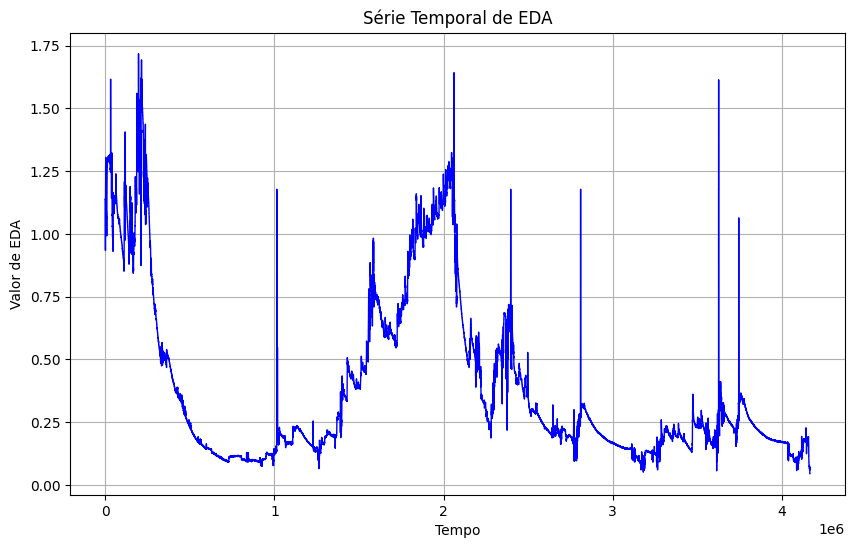

In [ ]:
# Plotar a série temporal de EDA
eda_df = finallabel[['EDA']]

plt.figure(figsize=(10, 6))
plt.plot(eda_df.index, eda_df['EDA'], color='blue', linewidth=1)
plt.title('Série Temporal de EDA')
plt.xlabel('Tempo')
plt.ylabel('Valor de EDA')
plt.grid(True)
plt.show()

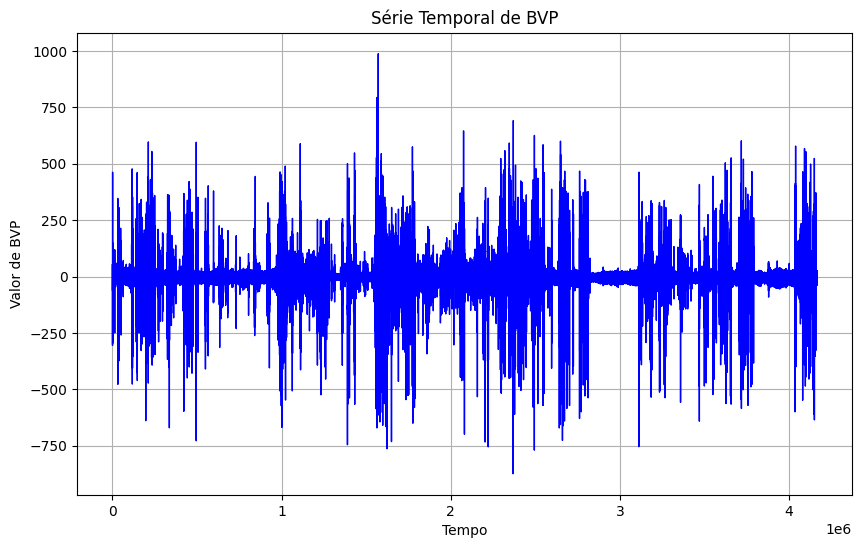

In [ ]:
# Plotar a série temporal de BVP
bvp_df = finallabel[['BVP']]

plt.figure(figsize=(10, 6))
plt.plot(bvp_df.index, bvp_df['BVP'], color='blue', linewidth=1)
plt.title('Série Temporal de BVP')
plt.xlabel('Tempo')
plt.ylabel('Valor de BVP')
plt.grid(True)
plt.show()

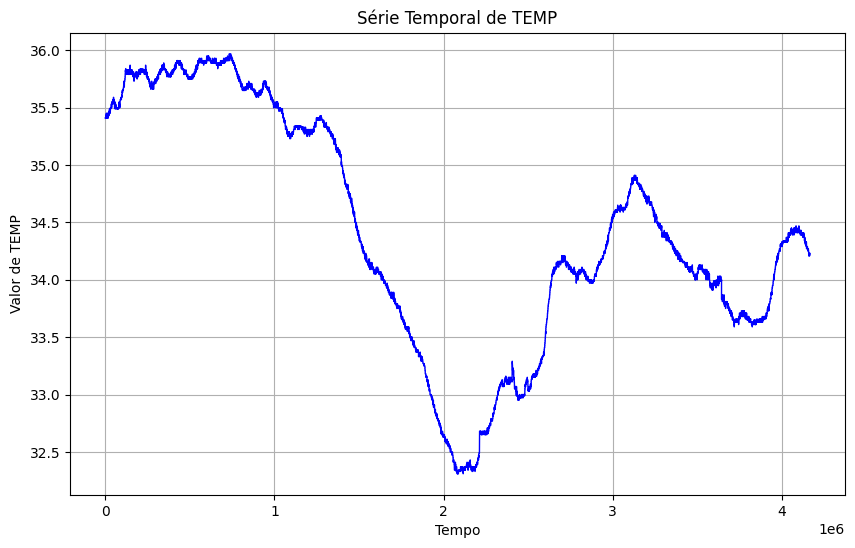

In [ ]:
# Plotar a série temporal de TEMP
temp_df = finallabel[['TEMP']]

plt.figure(figsize=(10, 6))
plt.plot(temp_df.index, temp_df['TEMP'], color='blue', linewidth=1)
plt.title('Série Temporal de TEMP')
plt.xlabel('Tempo')
plt.ylabel('Valor de TEMP')
plt.grid(True)
plt.show()

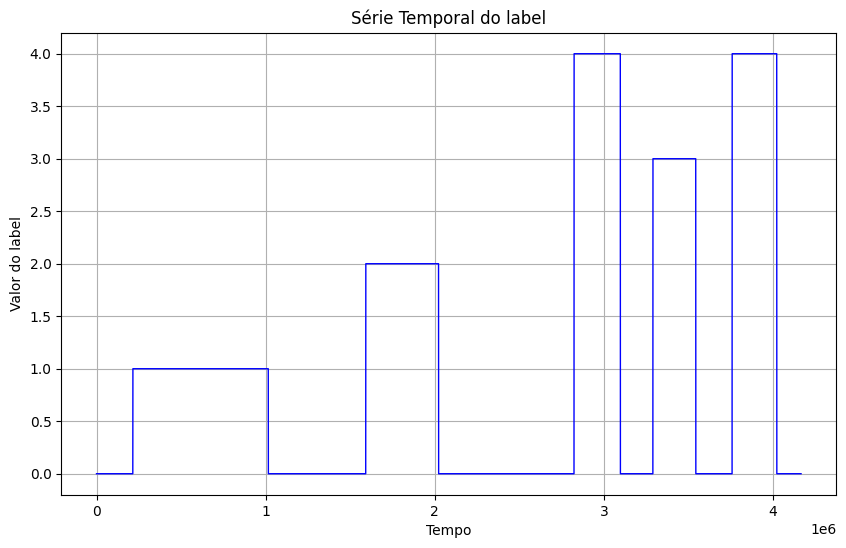

In [ ]:
# Plotar a série temporal do label
label_df = finallabel[['label']]

plt.figure(figsize=(10, 6))
plt.plot(label_df.index, label_df['label'], color='blue', linewidth=1)
plt.title('Série Temporal do label')
plt.xlabel('Tempo')
plt.ylabel('Valor do label')
plt.grid(True)
plt.show()

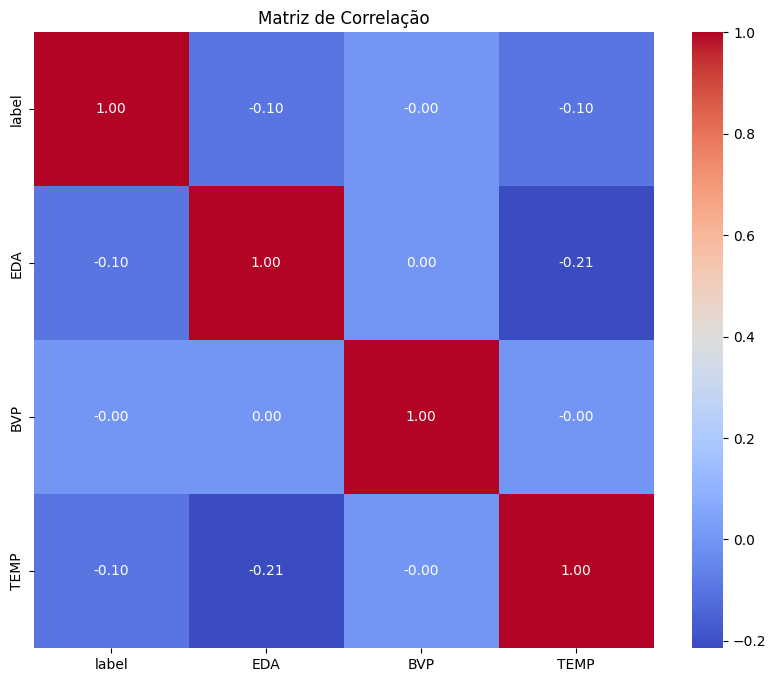

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando a matriz de correlação
correlation_matrix = finallabel.corr()

# Plotando a matriz de correlação usando heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
def segment_dataframe(dataframe, window_size, step):
    segments = []
    for i in range(0, len(dataframe) - window_size + 1, step):
        segment = dataframe.iloc[i:i+window_size]
        segments.append(segment)
    return pd.concat(segments, axis=0, ignore_index=True)

# Defina o tamanho da janela e o passo deslizante
window_size = 10
step = 5

# Segmentar o DataFrame
segmented_df = segment_dataframe(finallabel, window_size, step)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(segmented_df[['EDA', 'BVP', 'TEMP']])
y = segmented_df['label']
X_train, X_test, y_train, y_test = train_test_split(X_scaled_minmax, y, test_size=0.2, random_state=42)

# Inicializando e treinando o classificador k-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Prevendo os rótulos para os dados de teste
y_pred = knn.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do k-NN:", accuracy)

Acurácia do k-NN: 0.9761161452477015


In [ ]:
# Normalizando os dados usando Min-Max Scaler
scaler_minmax = MinMaxScaler()
X_eda_scaled_minmax = scaler_minmax.fit_transform(segmented_df[['EDA']])
X_bvp_scaled_minmax = scaler_minmax.fit_transform(segmented_df[['BVP']])
X_temp_scaled_minmax = scaler_minmax.fit_transform(segmented_df[['TEMP']])

# Dividindo os dados normalizados em treinamento e teste para EDA
X_train_eda, X_test_eda, y_train, y_test = train_test_split(X_eda_scaled_minmax, y, test_size=0.2, random_state=42)

# Inicializando e treinando o classificador k-NN para EDA
knn_eda = KNeighborsClassifier(n_neighbors=3)
knn_eda.fit(X_train_eda, y_train)
y_pred_eda = knn_eda.predict(X_test_eda)
accuracy_eda = accuracy_score(y_test, y_pred_eda)
print("Acurácia do k-NN para EDA:", accuracy_eda)

# Dividindo os dados normalizados em treinamento e teste para BVP
X_train_bvp, X_test_bvp, y_train, y_test = train_test_split(X_bvp_scaled_minmax, y, test_size=0.2, random_state=42)

# Inicializando e treinando o classificador k-NN para BVP
knn_bvp = KNeighborsClassifier(n_neighbors=3)
knn_bvp.fit(X_train_bvp, y_train)
y_pred_bvp = knn_bvp.predict(X_test_bvp)
accuracy_bvp = accuracy_score(y_test, y_pred_bvp)
print("Acurácia do k-NN para BVP:", accuracy_bvp)

# Dividindo os dados normalizados em treinamento e teste para TEMP
X_train_temp, X_test_temp, y_train, y_test = train_test_split(X_temp_scaled_minmax, y, test_size=0.2, random_state=42)

# Inicializando e treinando o classificador k-NN para TEMP
knn_temp = KNeighborsClassifier(n_neighbors=3)
knn_temp.fit(X_train_temp, y_train)
y_pred_temp = knn_temp.predict(X_test_temp)
accuracy_temp = accuracy_score(y_test, y_pred_temp)
print("Acurácia do k-NN para TEMP:", accuracy_temp)

Acurácia do k-NN para EDA: 0.5986771611879093
Acurácia do k-NN para BVP: 0.4413783980421986
Acurácia do k-NN para TEMP: 0.6913354057808057
